In [1]:
# Spotify API
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from credentials import *

# Data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'spotipy'

In [29]:
# Get top 5 recent artists and tracks
recent_top_artists = \
    {artist['uri']: {'name': artist['name'],
                     'popularity': artist['popularity']} for artist in \
         sp.current_user_top_artists(time_range='short_term', limit=5)['items']}

recent_top_tracks = \
    {track['uri']: {'name': track['name'],
                   'popularity': track['popularity'],
                   'length_ms': track['duration_ms']}
    for track in sp.current_user_top_tracks(time_range='short_term', limit=5)['items']}

In [28]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri=APP_REDIRECT_URI,
                                               scope=["user-library-read", "user-top-read"]))

In [70]:
# Get top 50 longterm artists and tracks
# 50 = max number of tracked top tracks/artists by Spotify API for user

longterm_top_artists = \
    {artist['uri']: {'name': artist['name'],
                     'popularity': artist['popularity'],
                     'genres': artist['genres']} for artist in \
         sp.current_user_top_artists(time_range='long_term', limit=50)['items']}

longterm_top_tracks = \
    {track['uri']: {'name': track['name'],
                   'popularity': track['popularity'],
                   'length_ms': track['duration_ms']}
    for track in sp.current_user_top_tracks(time_range='long_term', limit=50)['items']}

top_artists_ranked = [artist['uri'] for artist in sp.current_user_top_artists(time_range='long_term', limit=100)['items']]
top_tracks_ranked = [track['uri'] for track in sp.current_user_top_tracks(time_range='long_term', limit=100)['items']]

In [71]:
# Get favourite genres of user, based on top longterm 100 artists for user and the genres they belong to
user_top_genres = list(pd.core.common.flatten(
    list(map(lambda artist: longterm_top_artists[artist]['genres'],
             longterm_top_artists))
))

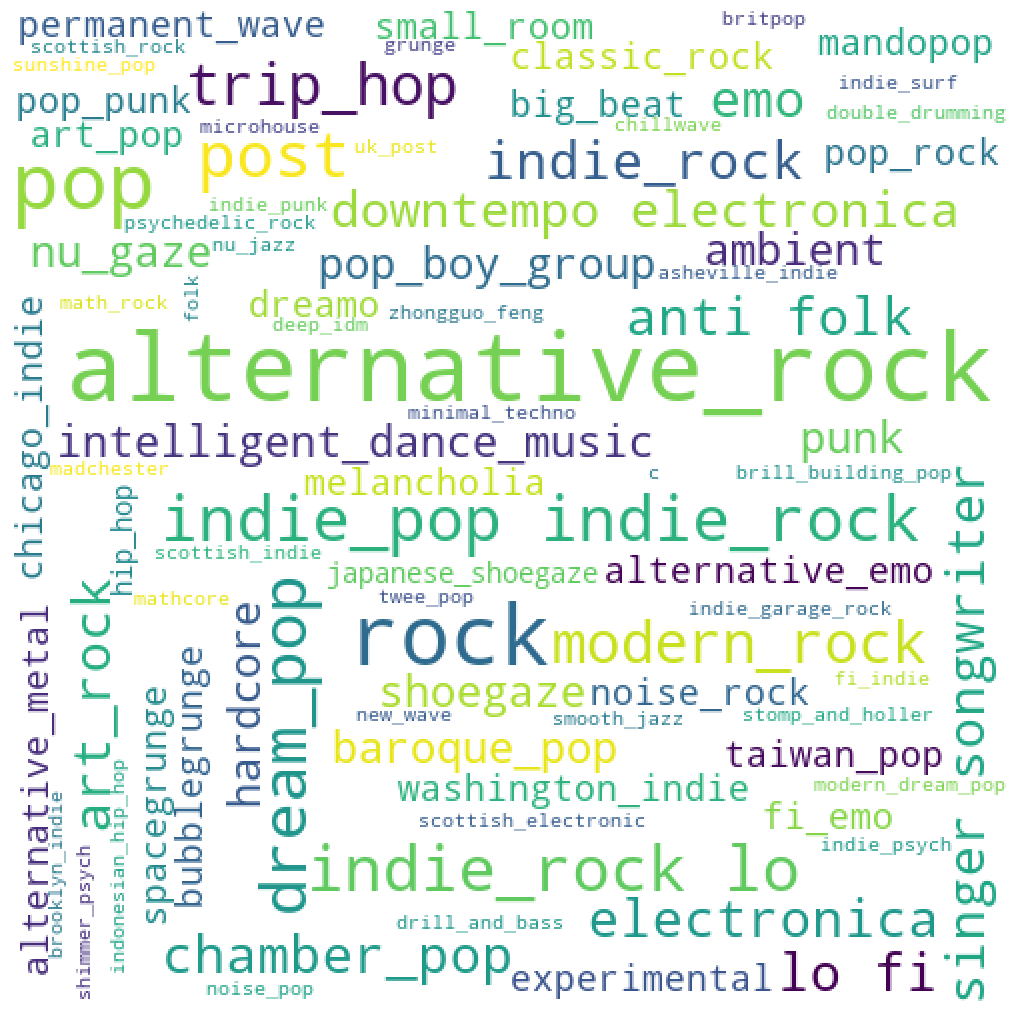

In [72]:
# Get top 5 genres represented by top 100 longterm artists for user
# Replace whitespace w/ underscore so multi-word genres are treated as individual "words" in the wordcloud
user_top_genres = [genre.replace(' ', '_') for genre in user_top_genres]

genre_wordcloud = WordCloud(width=500, height=500, background_color='white',
                            min_font_size=10).generate(' '.join(user_top_genres))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(genre_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('./top_genre_wordcloud.png')

In [73]:
# Get 5 track recommendations for user based on their top 5 longterm artists
# NOTE: only using top 5 longterm artists, as you can only use a maximum of 5 seed artists/tracks/genres for
# getting recommendations with the Spotify API
user_track_recommendations = {track['uri']: {'name': track['name'],
                                             'artist': track['artists'][0]['name'],
                                             'link': track['external_urls']} for track in \
                              sp.recommendations(seed_artists=top_artists_ranked[:5], limit=5)['tracks']}

In [86]:
# Analyze distribution of popularity scores for 50 most played songs
fig, ax = plt.subplots()

sns.displot([longterm_top_tracks[track]['popularity'] for track in longterm_top_tracks],
            x='Track popularity score', kind='kde', ax=ax)

ax.set_xlim(1, 101)
ax.set_xticks(range(1, 101, 10))

[44,
 20,
 43,
 61,
 54,
 36,
 53,
 52,
 0,
 77,
 40,
 41,
 56,
 46,
 68,
 50,
 23,
 40,
 44,
 53,
 58,
 60,
 61,
 62,
 0,
 74,
 50,
 50,
 51,
 15,
 36,
 15,
 62,
 53,
 18,
 64,
 42,
 13,
 41,
 80,
 39,
 28,
 39,
 63,
 34,
 34,
 41,
 59,
 50,
 51]